<a href="https://colab.research.google.com/github/mAminl/HWs/blob/master/DL2022_HW1_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: MohammadAmin Latifi
2.   Student Number: 401300966


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

train = dataset[:int(len(dataset) * 0.8)]
test = dataset[int(len(dataset) * 0.8):]

x_train = train.iloc[: , -2].copy()
y_train = train.iloc[: , -1].copy()

x_test = test.iloc[: , -2].copy()
y_test = test.iloc[: , -1].copy()


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
x_train = x_train.to_numpy()
x_train = x_train.reshape(len(x_train),1)
x_train = np.concatenate([x_train, np.ones((len(x_train),1))], axis=1)
y_train = y_train.to_numpy()
y_train = y_train.reshape(len(y_train),1)

m = np. linalg. inv(x_train.T@x_train)@x_train.T@y_train
print(m)

[[-1.02641738]
 [ 0.81500634]]


In [4]:
x_train = x_train[:,0]
# x_test = X_test
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train,predicted_train_y)
test_error = mean_squared_error(y_test,predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32467763017774226
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

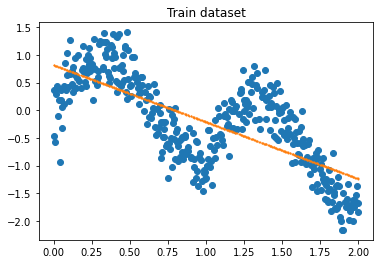

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

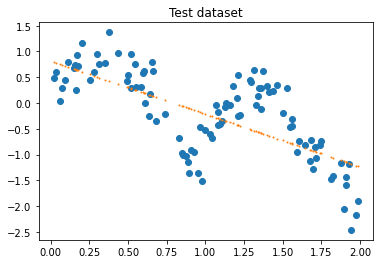

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

**Simply the results show that the accuracy of the test data is not good, but its value is very close to the train data accuracy which means linear regression is not suitable for these data. It can be seen clearly in the above figures.**

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

**Yes, it is like non-linear data are approximated by a piecewise linear function.**

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    d = -2*pow(hyperparameter,2)
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(np.dot((xi-the_query_point), (xi-the_query_point).T)/d) 
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    train_dataset = train_X
    l = train_dataset.shape[0]
    train_X = train_X.reshape(len(train_X),1)
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.linalg.pinv(X.T*(W * X))*(X.T*(W * train_Y)) 

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
hyperparameter = 0.08
predicted_test = np.array([predict(x_train, y_train, query, hyperparameter) for query in x_test]).reshape(len(y_test),1)
error = mean_squared_error(y_test,predicted_test)
print(f"MSE test error: {error}")

MSE test error: 0.10154387286200083


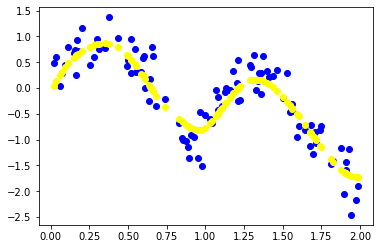

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

**Yes, As describe before, We handle non-linearity by picewise linear approximations, so the error reduced**

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

**Since datas are locally concentrated, It seems that KNN is also working.**

### Part10:
Implementing the `KNN model`.

In [15]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y
    def distance(self, x1, x2):
        distance = abs(x1-x2)# implement the distance function
        return distance

    def return_nn_ids(self, x):
        d = self.distance(self.X,x)
        sort_index = np.argsort(d)
        indices = sort_index[:self.k]# find indices of k nearest neighbours to x
        # print(indices)
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        x_near = self.X[neareest_indices]
        x_near = x_near.reshape(len(x_near),1)
        y_near = self.Y[neareest_indices].flatten()
        y_near = y_near.reshape(len(y_near),1)
        predicted_y = np.mean(y_near)
        return predicted_y

In [23]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test,predicted_y)
    return error, predicted_y

The best number of neighbours is: 16
MSE error of KNN for test dataset: 0.09837610676149099


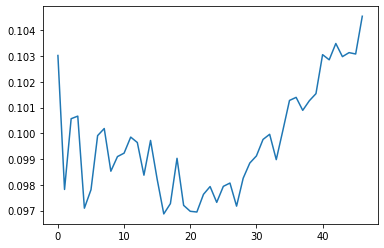

In [29]:
e = []
for k in range(3,50):
  error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
  e.append(error_knn)
plt.plot(e)
best_k = np.argmin(e)
error_knn, predicted_y = evaluation(best_k, x_train, y_train, x_test, y_test)
print(f"The best number of neighbours is: {best_k}")
print(f"MSE error of KNN for test dataset: {error_knn}")

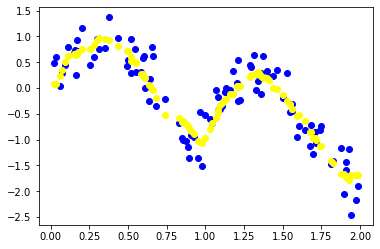

In [30]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

**Although the accuracy of KNN is better than others, its accuracy is dependent on data. The model performance may be influenced by outliers. Moreover, a hyperparameter must be estimated.**